In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def odl(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2)

In [3]:
def odl_bez_sqrt(p1, p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2)

In [4]:
def wybierz_szpitale(punkty, n, k):
    # O(n) - wypełniamy listę odleglosciami do najblizszego szpitala
    # początkowo przyjmuje wartość maksymalnej przekątnej w przestrzeni wyznaczonej przez punkty
    # nawet nie znając zakresu punktów, szukanie skrajnych wartosci x, y, z może zająć O(3*n), więc nie przejmujemy się tym
    odl_do_szpitali = [odl([0,0,0], [30,30,30])]*n
    szpitale = []
    
    # na pierwszy szpital wyznaczamy pierwszy lepszy punkt
    maks = 0
    # O(n*k)
    for i in range(k):
        maks_ = (0,0)
        szpitale.append(punkty[maks])
        for j in range(n):
            # jeśli nowy szpital jest blizszy niz poprzedni najblizszy, aktualizujemy
            odl_do_szpitali[j] = min(odl_do_szpitali[j], odl(punkty[maks], punkty[j]))
            if odl_do_szpitali[j] > maks_[1]:
                maks_ = (j, odl_do_szpitali[j])
            # print("maks:", maks, "j:", j, "odl:",odl_do_szpitali[j])
        # np.argmax(list) znajduje argument najwiekszego elementu w liscie O(n)
        # nowy szpital powstanie w punkcie najdalszym od jakiegokolwiek szpitala 
        maks = maks_[0]

    return max(odl_do_szpitali), szpitale

In [5]:
def wybierz_szpitale_bez_sqrt(punkty, n, k):
    # O(n) - wypełniamy listę odleglosciami do najblizszego szpitala
    # początkowo przyjmuje wartość maksymalnej przekątnej w przestrzeni wyznaczonej przez punkty
    # nawet nie znając zakresu punktów, szukanie skrajnych wartosci x, y, z może zająć O(3*n), więc nie przejmujemy się tym
    odl_do_szpitali = [odl_bez_sqrt([0,0,0], [30,30,30])]*n
    szpitale = []
    
    # na pierwszy szpital wyznaczamy pierwszy lepszy punkt
    maks = 0
    # O(n*k)
    for i in range(k):
        maks_ = (0,0)
        szpitale.append(punkty[maks])
        for j in range(n):
            # jeśli nowy szpital jest blizszy niz poprzedni najblizszy, aktualizujemy
            odl_do_szpitali[j] = min(odl_do_szpitali[j], odl_bez_sqrt(punkty[maks], punkty[j]))
            if odl_do_szpitali[j] > maks_[1]:
                maks_ = (j, odl_do_szpitali[j])
            # print("maks:", maks, "j:", j, "odl:",odl_do_szpitali[j])
        # np.argmax(list) znajduje argument najwiekszego elementu w liscie O(n)
        # nowy szpital powstanie w punkcie najdalszym od jakiegokolwiek szpitala 
        maks = maks_[0]

    return sqrt(max(odl_do_szpitali)), szpitale

In [6]:
def generuj(n, k):
    # dla powtarzalnosci wynikow z tymi samymi n i różnymi k ustawiam ziarno generatora na sztywno
    random.seed(42)
    punkty = np.array([[random.randint(0,30), random.randint(0,30), random.randint(0,30)] for i in range(0, n)])
    maks, szpitale = wybierz_szpitale(punkty, n, k)
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    for p in punkty:
        ax.scatter(p[0], p[1], p[2], zdir='z', c='b')

    for p in szpitale:
        ax.scatter(p[0], p[1], p[2], zdir='z', c='r')

    plt.show()

    print("Maksymalna odleglosc do szpitala wynosi", maks)

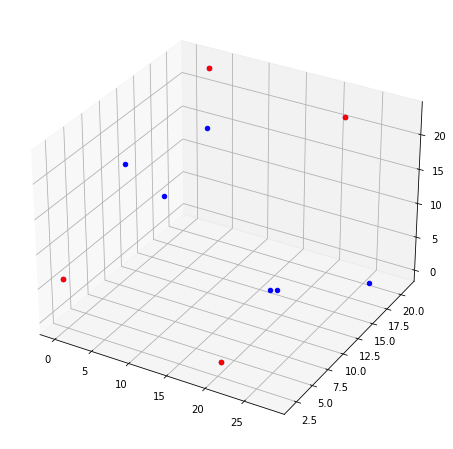

Maksymalna odleglosc do szpitala wynosi 17.46424919657298


In [7]:
generuj(10,4)

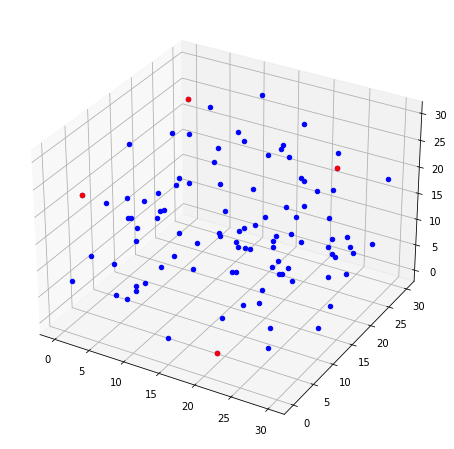

Maksymalna odleglosc do szpitala wynosi 25.632011235952593


In [8]:
generuj(100,4)

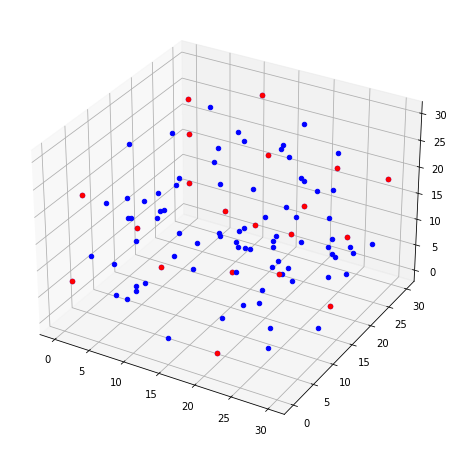

Maksymalna odleglosc do szpitala wynosi 9.899494936611665


In [9]:
generuj(100,20)

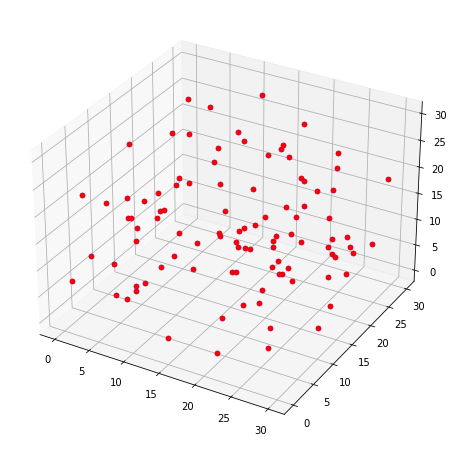

Maksymalna odleglosc do szpitala wynosi 0.0


In [10]:
generuj(100,100)

In [11]:
def porownaj(n, k):
    # dla powtarzalnosci wynikow z tymi samymi n i różnymi k ustawiam ziarno generatora na sztywno
    print("n:", n, "k:", k)
    random.seed(42)
    punkty = np.array([[random.randint(0,30), random.randint(0,30), random.randint(0,30)] for i in range(0, n)])
    start = time.time()
    maks, _ = wybierz_szpitale(punkty, n, k)
    print("z pierwiastkowaniem:\t%s s" % (time.time() - start))
    
    start = time.time()
    maks, _ = wybierz_szpitale_bez_sqrt(punkty, n, k)
    print("bez pierwiastkowania:\t%s s" % (time.time() - start))
    

In [12]:
porownaj(100, 10)

n: 100 k: 10
z pierwiastkowaniem:	0.005991458892822266 s
bez pierwiastkowania:	0.004001617431640625 s


In [18]:
porownaj(1000, 100)

n: 1000 k: 100
z pierwiastkowaniem:	0.40020275115966797 s
bez pierwiastkowania:	0.381763219833374 s


In [17]:
porownaj(10000, 1000)

n: 10000 k: 1000
z pierwiastkowaniem:	38.99634766578674 s
bez pierwiastkowania:	37.37897753715515 s


In [19]:
porownaj(1000000, 100)

n: 1000000 k: 100
z pierwiastkowaniem:	391.6437885761261 s
bez pierwiastkowania:	377.1156642436981 s
